In [31]:
import numpy as np
import pandas as pd
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array
import keras
from keras.models import load_model
from keras.losses import binary_crossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D, MaxPool2D

In [32]:
file_path = "Brain Tumor/brain tumor/Brain Tumor Data Set/Brain Tumor Data Set"
img_size = 224
target_size = (img_size, img_size)
case_of_image = {
    0:"Brain Tumor", 1: "Healthy"
}
filters = 8
pool_size = (2, 2)
kernel_size = (3, 3)
batch_size = 64
activation = "relu"
rate = 0.25
optimizer = "adam"
epochs=40

In [33]:
number_of_images = {}

for folder in os.listdir(file_path):
    number_of_images[folder] = len(os.listdir(os.path.join(file_path, folder)))
number_of_images

{'Brain Tumor': 2513, 'Healthy': 2087}

In [34]:
data_gen = ImageDataGenerator(rescale = 1.0/255, validation_split = 0.2)

In [35]:
train_gen = data_gen.flow_from_directory(
    file_path,
    target_size = target_size,
    batch_size = batch_size,
    color_mode = "grayscale",
    shuffle = True,
    class_mode = "binary",
    subset = "training"
    
)

Found 3681 images belonging to 2 classes.


In [36]:
test_gen = data_gen.flow_from_directory( 
    file_path,
    target_size = target_size,
    batch_size = batch_size,
    color_mode = "grayscale",
    shuffle = False,
    class_mode = "binary",
    subset = "validation"
)

Found 919 images belonging to 2 classes.


C:\Users\chira\AppData\Local\Temp\ipykernel_27940\3989974217.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,i+1)


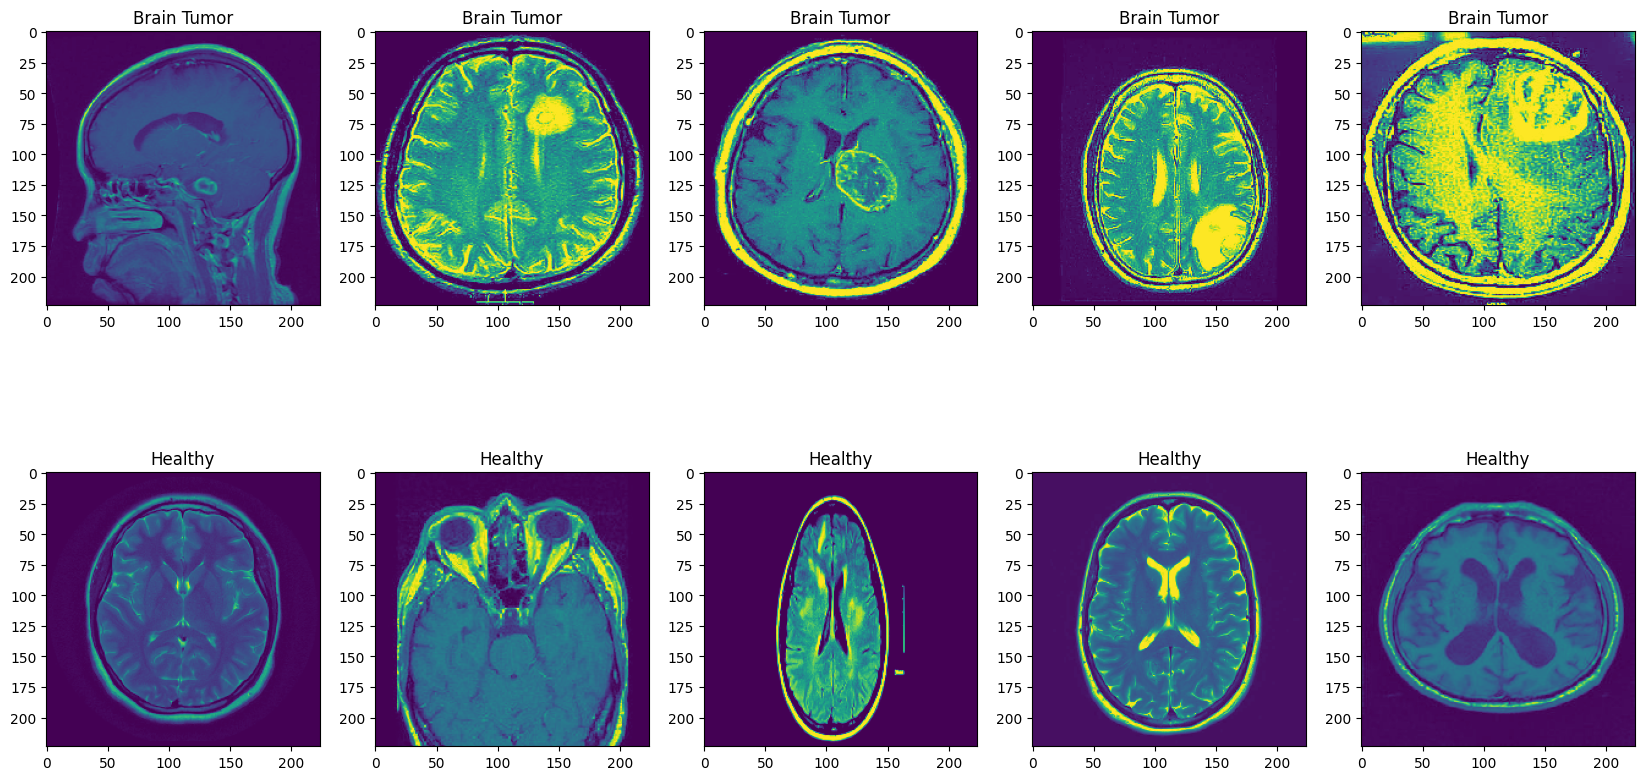

In [37]:
fig, ax = plt.gcf(), plt.gca()
fig.set_size_inches(20.5, 10.5)

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(test_gen[7][0][i+49])
    plt.title(case_of_image[test_gen[7][1][i+49]])

C:\Users\chira\AppData\Local\Temp\ipykernel_27940\3367178117.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,i+1)


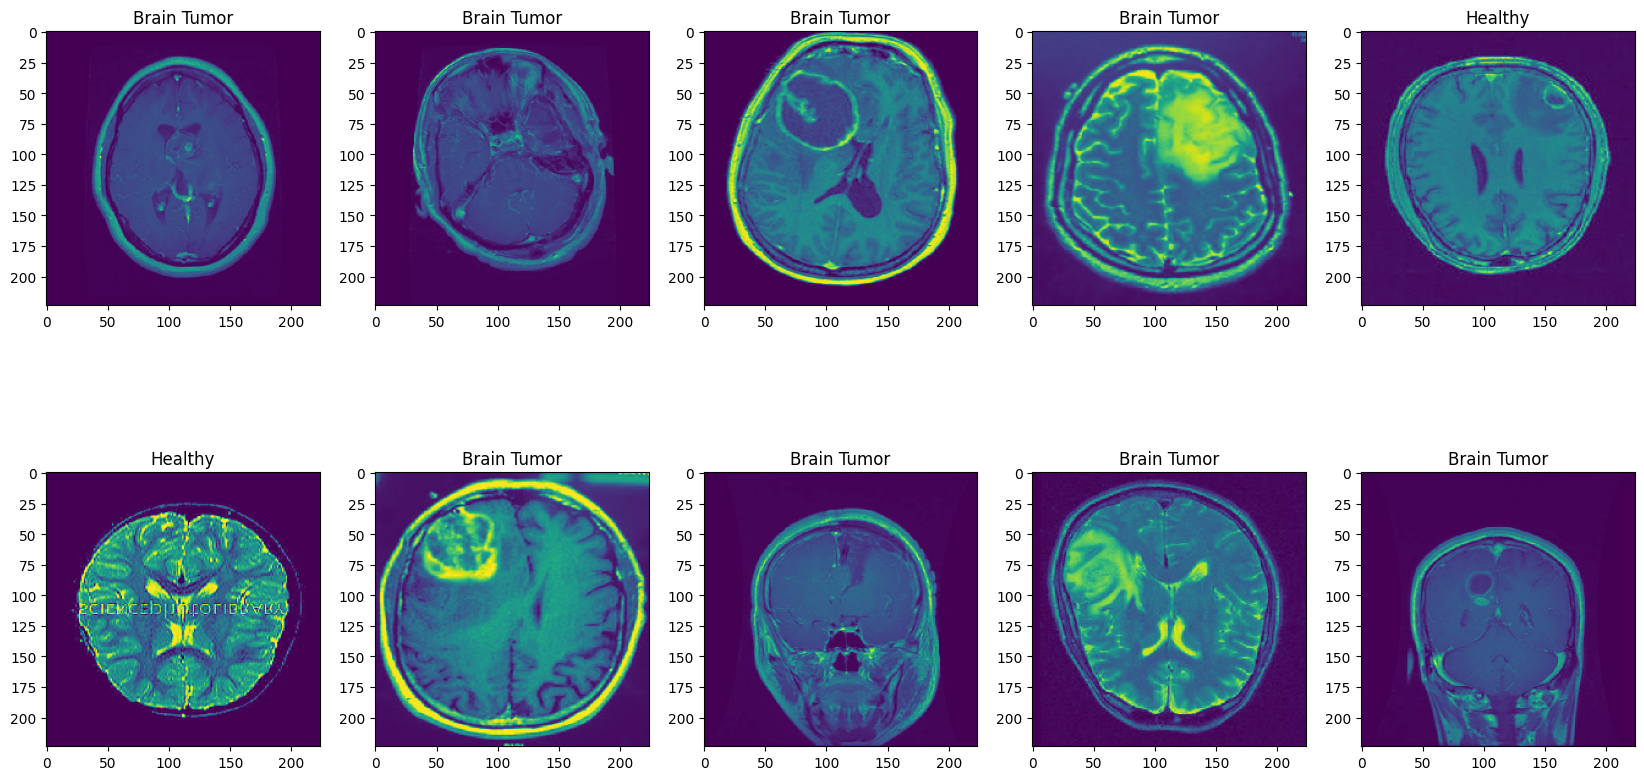

In [38]:
fig, ax = plt.gcf(), plt.gca()
fig.set_size_inches(20.5, 10.5)

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_gen[7][0][i+5])
    plt.title(case_of_image[train_gen[7][1][i+5]])

In [39]:
model = Sequential()

In [40]:
input_shape = train_gen[0][0][0].shape
model.add(Conv2D(filters=filters, kernel_size=kernel_size, input_shape=input_shape, activation=activation))

model.add(Conv2D(filters=filters * 2, kernel_size=kernel_size, activation=activation))
model.add(MaxPool2D(pool_size=pool_size))

model.add(Conv2D(filters=filters * 4, kernel_size=kernel_size, activation=activation))
model.add(MaxPool2D(pool_size=pool_size))

model.add(Conv2D(filters=filters * 8, kernel_size=kernel_size, activation=activation))
model.add(MaxPool2D(pool_size=pool_size))

model.add(Conv2D(filters=filters * 16, kernel_size=kernel_size, activation=activation))
model.add(MaxPool2D(pool_size=pool_size))

model.add(Dropout(rate=rate))
model.add(Flatten())
model.add(Dense(units=filters*8, activation=activation))

model.add(Dropout(rate=rate))
model.add(Dense(units=filters//8, activation='sigmoid'))

AttributeError: module 'keras.src.backend' has no attribute 'RandomGenerator'

In [ ]:
model.summary()

In [ ]:
model.compile(loss=binary_crossentropy, optimizer=optimizer, metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01, verbose=1, mode='auto')
mcp = ModelCheckpoint(monitor='val_accuracy', verbose=1, mode='auto', filepath='Models/Brain Tumor.h5')
em = [es, mcp]

In [ ]:
model = model.fit_generator(
    train_gen,
    steps_per_epoch=(train_gen.samples // batch_size) ,
    epochs=epochs,
    validation_data=test_gen,
    callbacks=em
)

In [ ]:
history = model.history

In [ ]:
plt.subplots(figsize=(8, 4))
plt.plot(history["accuracy"], c='r', label='accuracy')
plt.plot(history["val_accuracy"], c='g', label='val_accuracy')
plt.title('Accuracy VS. val_accuracy')
plt.xlabel("epoch")
plt.legend()

In [ ]:
plt.subplots(figsize=(8, 4))
ax = plt.gca()
ax.plot(history["loss"], c='r', label='loss')
ax.plot(history["val_loss"], c='g', label='val_loss')
plt.title("Loss VS. Val_loss")
plt.xlabel("epoch")
plt.legend()

In [41]:
model = load_model("Models/Brain Tumor.h5")

TypeError: Error when deserializing class 'Conv2D' using config={'name': 'conv2d', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 224, 224, 1], 'filters': 8, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}.

Exception encountered: module 'keras.src.backend' has no attribute 'RandomGenerator'

In [ ]:
img_list = [
    'Brain Tumor/brain tumor/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg',
    'Brain Tumor/brain tumor/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1068).jpg',
    'Brain Tumor/brain tumor/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1001).jpg',
    'Brain Tumor/brain tumor/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg'
]

In [ ]:
true_labels = [
    'Brain Tumor (0)',
    'Healthy (1)',
    'Healthy (1)',
    'Brain Tumor (0)'
]

In [ ]:
for x in range(len(img_list)):
    img = load_img(img_list[x], target_size=target_size, color_mode="grayscale")
    img = img_to_array(img) / 255
    img = np.expand_dims(img, axis=0)
    print(f"{x}...")
    print(img.shape)
    print()
    pred = model.predict(img)
    predicted_class = np.argmax(pred, axis=-1)
    print(predicted_class)
    print(f"true label: {true_labels[x]}")
    print()
    print()